## London Bike Sharing Analysis

In [1]:
# Importing useful libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing London Bike Sharing Dataset

df = pd.read_csv("london_merged.csv")

In [3]:
# 1st five rows of dataset

df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
# last 5 rows of dataset

df.tail()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


The columns in the Bike Share London dataset represent the following:

- `timestamp`: The date and time when the data was recorded.
- `count`: The number of bikes rented at that particular timestamp.
- `c_temp`: The temperature in Celsius at that particular timestamp.
- `f_temp`: The temperature Feels like at that particular timestamp.
- `humidity`: The humidity level at that particular timestamp.
- `wind_speed`: The wind speed at that particular timestamp.
- `weather_code`: A code representing the weather condition at that particular timestamp.{1:Clear,2:scattered Clouds,3:Broken clouds,4:Cloudy,7:Rain,10:Rain with thunderstorm,26:snowfall,94:Freezing Fog}
- `is_holiday`: A binary value indicating whether the day is a holiday or not (1 for holiday, 0 for non-holiday).
- `is_weekend`: A binary value indicating whether the day is a weekend or not (1 for weekend, 0 for non-weekend).
- `season`: A value representing the season at that particular timestamp {0 : Spring , 1 : Summer , 2 : Autumn , 3 : Winter}.

## Exploratory Data Analysis (EDA)

In [5]:
# Rows and Columns of the Dataset

rows,columns = df.shape
print("The number of rows in the Dataset are : {} and number of columns in the Dataset are {}".format(rows,columns))

The number of rows in the Dataset are : 17414 and number of columns in the Dataset are 10


In [6]:
# Names of the columns

print(df.columns)

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [7]:
# Renaming some of the Columns

df.rename(columns={'cnt':'count','t1':'c_temp','t2':'f_temp','hum':'humidity'},inplace=True)
print(df.columns)

Index(['timestamp', 'count', 'c_temp', 'f_temp', 'humidity', 'wind_speed',
       'weather_code', 'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [8]:
# DataTypes of Each Column

df.dtypes

timestamp        object
count             int64
c_temp          float64
f_temp          float64
humidity        float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [9]:
# Missing Values 

df.isnull().sum()

timestamp       0
count           0
c_temp          0
f_temp          0
humidity        0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [10]:
# Feature Engineering 4 new columns from timestamp column and also weather_code

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['year']=df['timestamp'].dt.year
df['day'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour
df['week'] = df['timestamp'].dt.isocalendar().week

weather_dict = {1: 'Clear', 2: 'Scattered Clouds', 3: 'Broken Clouds', 
                4: 'Cloudy', 7: 'Rain', 10: 'Rain with Thunderstorm', 
                26: 'Snowfall'}

df['weather'] = df['weather_code'].map(weather_dict)


In [11]:
# Daily Average Bike Shares Per season

grouped_seasons_avg = ((df.groupby(['season'])['count'].mean())*24).reset_index() # multiplied by 24 to get daily average
grouped_seasons_avg

,season,count
0,0.0,26491.958125
1,1.0,35147.165717
2,2.0,28294.901232
3,3.0,19721.498383


In [12]:
# The number of Bike shares when the weather is hottest

df[df['c_temp'] == df['c_temp'].max()]

,timestamp,count,c_temp,f_temp,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,year,day,hour,week,weather
4278,2015-07-01 17:00:00,4617,34.0,34.0,33.0,20.5,1.0,0.0,0.0,1.0,2015,Wednesday,17,27,Clear
4279,2015-07-01 18:00:00,4604,34.0,34.0,33.0,20.5,1.0,0.0,0.0,1.0,2015,Wednesday,18,27,Clear


In [13]:
# The Number of Bike shares when the Weather is coldest

df[df['c_temp']==df['c_temp'].min()]

,timestamp,count,c_temp,f_temp,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,year,day,hour,week,weather
461,2015-01-23 06:00:00,426,-1.5,-2.5,89.5,5.0,1.0,0.0,0.0,3.0,2015,Friday,6,4,Clear


In [14]:
# The number of Bike shares when the Wind speed is highest

df[df['wind_speed']==df['wind_speed'].max()]

,timestamp,count,c_temp,f_temp,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,year,day,hour,week,weather
7597,2015-11-17 21:00:00,644,15.0,15.0,59.0,56.5,3.0,0.0,0.0,2.0,2015,Tuesday,21,47,Broken Clouds


In [15]:
#Seasons

spring = df[df['season']==0]
autumn = df[df['season']==2]
winter = df[df['season']==3]
summer = df[df['season']==1]

In [16]:
# Lowest Number of Bike Shares in Winter

winter[winter['count']==winter['count'].min()]

,timestamp,count,c_temp,f_temp,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,year,day,hour,week,weather
17393,2017-01-03 03:00:00,10,0.0,-4.0,93.0,13.0,1.0,0.0,0.0,3.0,2017,Tuesday,3,1,Clear


In [17]:
# Highest Number of Bike share in autumn or Fall

autumn[autumn['count'] == autumn['count'].max()]

,timestamp,count,c_temp,f_temp,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,year,day,hour,week,weather
14736,2016-09-14 08:00:00,5422,22.5,22.5,71.0,14.0,1.0,0.0,0.0,2.0,2016,Wednesday,8,37,Clear


In [18]:
#How is the bike rental demand distributed over year

ride_count_year = df.groupby(['year'])['count'].sum().reset_index(name='ride count')
ride_count_year

,year,ride count
0,2015,9738746
1,2016,10129546
2,2017,37680


In [19]:
#How is the bike rental demand distributed over weeks

weekly_ride_count = df.groupby(['week'])['count'].sum().reset_index(name='ride_count')
weekly_ride_count.head(33)

,week,ride_count
0,1,171617
1,2,270000
2,3,285224
3,4,289772
4,5,280705
5,6,272443
6,7,279712
7,8,277025
8,9,278652
9,10,320803


Week 27 - 32 have a significantly high number of bike rides. This is because of the summer season.

In [20]:
#How is the bike rental demand distributed over days

count_per_day = df.groupby(['day'])['count'].sum().reset_index(name='ride_count')
count_per_day.sort_values(ascending=False,by='ride_count')

,day,ride_count
4,Thursday,3136956
6,Wednesday,3097334
5,Tuesday,3081414
0,Friday,2897793
1,Monday,2834719
2,Saturday,2454040
3,Sunday,2403716


Rides count in the Weekdays is more as compared to the Weekend.

In [21]:
#How is the bike rental demand distributed over hours

count_by_hour = df.groupby(['hour'])['count'].sum().reset_index(name='ride_count')
count_by_hour.sort_values(ascending=False,by='ride_count')

,hour,ride_count
8,8,2087164
17,17,2059938
18,18,1913944
16,16,1364955
9,9,1201745
19,19,1200648
15,15,1140609
13,13,1096178
14,14,1071619
7,7,1066309


Rides count in the office hours is significantly higher than non-office hours

In [22]:
# Does the temperature (both actual and feels-like) have a noticeable impact on bike rentals?

df[['count','c_temp','f_temp']].corr()

,count,c_temp,f_temp
count,1.000000,0.388798,0.369035
c_temp,0.388798,1.000000,0.988344
f_temp,0.369035,0.988344,1.000000


Increasing Temperature have a positive impact on the Rental Bike Count but the correlation is not very strong

In [23]:
# Is there a correlation between bike rentals and wind speed, humidity, or other weather factors?

df[['count','wind_speed', 'humidity','season']].corr()

,count,wind_speed,humidity,season
count,1.000000,0.116295,-0.462901,-0.116180
wind_speed,0.116295,1.000000,-0.287789,0.010305
humidity,-0.462901,-0.287789,1.000000,0.290381
season,-0.116180,0.010305,0.290381,1.000000


The correlation coefficient between wind_speed and count is 0.116295, indicating a weak positive linear relationship. The correlation coefficient between humidity and count is -0.462901, indicating a moderate negative linear relationship. The correlation coefficient between season and count is -0.116180, indicating a weak negative linear relationship.

In [24]:
# Average Humidity in Spring

spring = df[df['season']==0]
avg_humidity = round(spring['humidity'].mean(),2)
print(f"The Average Humidity in Spring is : {avg_humidity}")

The Average Humidity in Spring is : 68.6


## Visualization

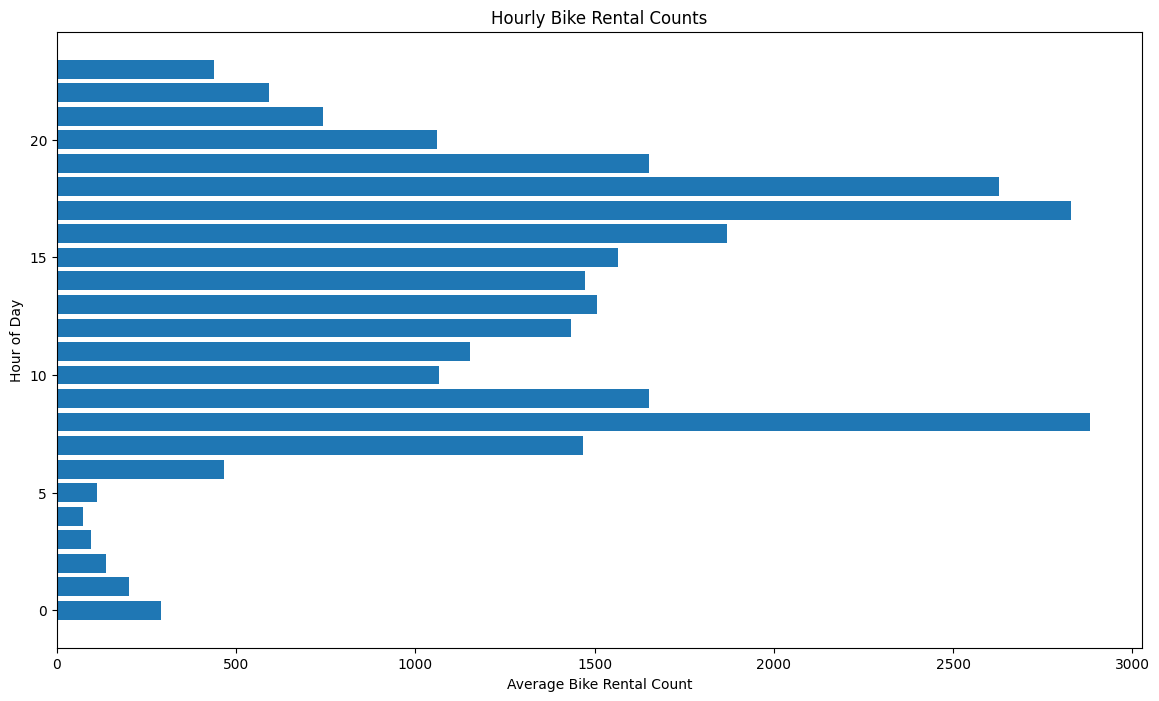

In [25]:
# Are there any specific time periods with higher/lower bike rental counts?

bike_count_avg = df.groupby(['hour'])['count'].mean().reset_index(name='avg_rides')

plt.figure(figsize=(14,8))
plt.barh(y=bike_count_avg['hour'],width=bike_count_avg['avg_rides'])
plt.xlabel('Average Bike Rental Count')
plt.ylabel('Hour of Day')
plt.title('Hourly Bike Rental Counts')
plt.show()

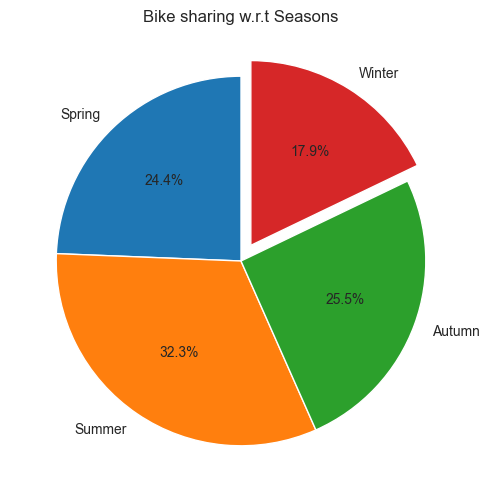

In [26]:
# What are the variations in bike rentals across different seasons?

grouped_seasons = df.groupby(['season'])['count'].sum().reset_index(name='ride_count')
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
plt.pie(grouped_seasons['ride_count'], labels=['Spring','Summer','Autumn','Winter'], autopct='%1.1f%%', startangle=90,explode=[0,0,0,0.1])
plt.title('Bike sharing w.r.t Seasons')
plt.show()

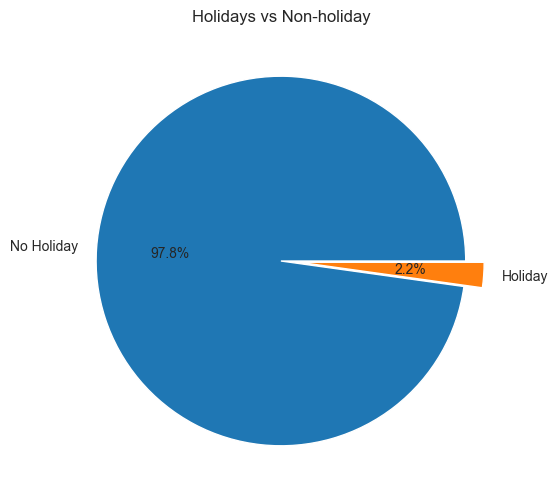

In [27]:
#How does the rental count change during holidays?

holiday_rental = df['is_holiday'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(holiday_rental,labels=['No Holiday','Holiday'],autopct = "%1.1f%%",explode=[0,0.1])
plt.title('Holidays vs Non-holiday')
plt.show()

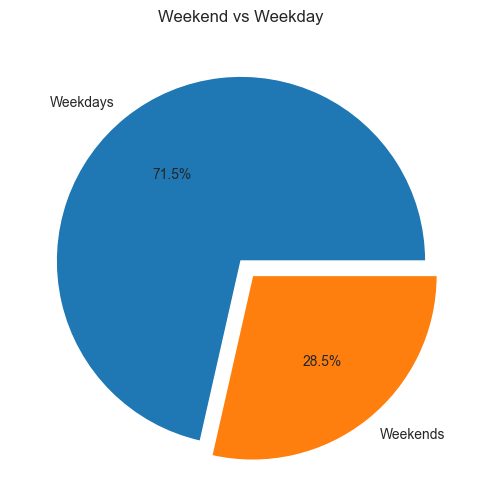

In [28]:
#How does the rental count change during weekends?

weekend_rental = df['is_weekend'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(weekend_rental,labels=['Weekdays','Weekends'],autopct = "%1.1f%%",explode=[0,0.1])
plt.title('Weekend vs Weekday')
plt.show()

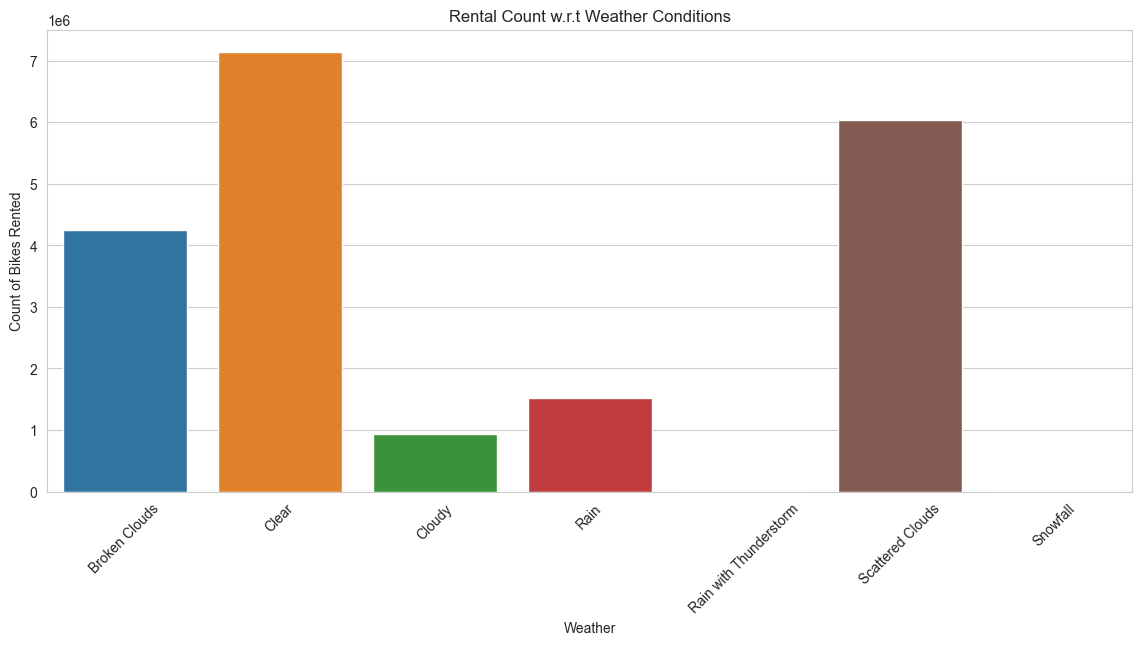

In [29]:
# How does the bike rental count vary with different weather conditions

rentals_by_weather = df.groupby(['weather'])['count'].sum().reset_index(name='ride_count')

plt.figure(figsize=(14,6))
sns.barplot(x='weather',y='ride_count', data=rentals_by_weather)
plt.xlabel("Weather")
plt.ylabel("Count of Bikes Rented")
plt.title("Rental Count w.r.t Weather Conditions")
plt.xticks(rotation=45)
plt.show()

### Bike Sharing System in London 

#### Conclusion :
People in London tend to use the bike sharing system more during the summer months, with the highest usage in July and August. The lowest usage is in December and January. This is likely due to the cold weather in the winter months. Moreover the bike sharing system is used more during the weekdays than the weekends. This is likely due to the fact that people use the bike sharing system to commute to work or school. The bike sharing system is used more during the morning and evening rush hours, which is also likely due to the fact that people use the bike sharing system to commute to work or school. Also the people in London rent the bike in Clear , Cloudy and Misty weather.